# Session 08 - Neural Networks: Part 1



> Before Starting, we will change the accelerator of this notebook from a CPU to a GPU, since we'll be running our Neural Networks on the GPU. 

> Go to Runtime --> Change Runtime Type --> GPU 




Welcome to the 8th practical session on Machine Learning. Today we're going to start learning about the most important and widely applied avenue of Machine Learning - *Deep Learning*. Deep Learning is nothing but a fancy word for Machine Learning applications with *Neural Networks*. 

But why does Deep Learning get to have a whole phrase dedicated to it? That's because Deep Learning is so flexible and efficient, that it can solve almost any problem in the modern age. Neural Networks have reached a point, where they can process almost any kind of data - videos, images, audio, text, tabular data, etc. And in a lot of applications, Neural Networks have been claimed to perform better than human performance. ([This](https://www.eff.org/ai/metrics) notebook provides a comparison of a lot of models on various benchmark problems along with human performance. You would get a general idea about the current state of Deep Learning).
 
That's crazy if you think about it, since Artificial Intelligence literally aspires to be as good as human intelligence. We consider human intelligence to be the most superior, and every form of intelligence, including animal intelligence, and Artificial Intelligence is compared to human intelligence. So, you would now understand why there is so much hype about Deep Learning. Almost all research (including corporate research too) in Machine Learning is about Deep Learning now.

## What are Neural Networks?

You may have seen a visual representation of Neural Networks before, something like the picture below.



![](https://drive.google.com/uc?id=1oXydloc3m8yNmM17Z4CvI1L8F4APRJiN)

This is nothing but an augmented version of the Linear Model we learned about in the Linear/Logistic Regression sessions. 

In the Linear Regression Model, we fed an input tensor (with different features $x_1$,$x_2$,...$x_n$ into the model $f(x) = w_1.x_1 + w_2.x_2 + w_3.x_3 + ..... + b$. (If you don't remember this, head back to the Linear Regression and Logisitic Regression sessions, and come back once you're clear with that concept!)

Neural Networks are nothing but multiple Linear functions stacked on top of each other. 

So the output of linear model is fed to the next, and this is done multiple times. Finally we get an output just like we did in Linear/Logistic Regression models. 

But wait, why do we even need to stack multiple Linear models on top of each other?

So, if you remember the Linear Regression session, you would know that the "model" is nothing but some mathematical function in the space of the feature vectors ($x_1$, $x_2$ and so on). Our job is to find that mathematical function that best solves a task (like a Cat vs Dog classification problem). 

But most of the times, the model is not necessarily as simple as a single Linear Function. Neural Networks is a series of linear functions, that apparantly, can represent *any* complexity of mathematical functions in space. The more the number of *layers*, or the number of linear stacks (in other words, the *deeper* the network) (Hence the name *Deep* Learning), the more complexity the model can handle. Isn't that an interesting approach?

While Deep Learning may have gained popularity in the past decade only, Neural Networks are definitely not a new concept. They existed as back as in 1940s. There is a wonderful article by Stanford University on the history of Neural Nets. [Check it out](https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/History/history1.html) if you want to know more! 

![](https://drive.google.com/uc?id=1zSbF-sQtR_-Ddf85vzjnfqCetOgAgJ2y)

This is how a Neural Networks work. Remember? in the Linear/Logistic Regression Model we fed an input, and passed it through the linear function, and based on the output, made our predictions! Here too, we feed the input through multiple linear functions, and based on the final output, make our predictions. We will look at this in more detail below!

In this session, we will learn how to build our own Neural Networks with PyTorch. We'll be learning how to use PyTorch's inbuilt functionality to vreate Neural Networks with minimal effort. Then we'll slowly breakdown each component and learn how to write them in python from scratch. That being said, this lab session has some really good lessons on python development, especially Object Oriented Programming concepts, which will help you develop better Machine Learning code for the rest of your life. Most Deep Learning practitioners are not good software developers, and so it is a valuable skill to master in order to develop efficient tools and techniques. 

## Case Study: A Classifier using Neural Networks

Let us pick a problem and solve it using Neural Networks. For the purpose of this lab, we'll be using the [*Fruits Dataset*](https://www.kaggle.com/moltean/fruits), which contains images of 44 fruits and vegetables, which we wish to classify. For simplicity, we'll only be classifying bwtween any 2 categories for now. 

Lets us dowload this data from kaggle. First of all, upload your *kaggle.json* file. 

In [1]:
%cd 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json 

!kaggle datasets download -d moltean/fruits
!unzip fruits.zip >./tmp
%cd fruits-360
!ls

/root


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes
100% 757M/760M [00:07<00:00, 98.6MB/s]
100% 760M/760M [00:07<00:00, 102MB/s] 
/root/fruits-360
LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


The following are the classes that we are dealing with.

In [2]:
!cd Training && ls

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

This dataset contains 100x100 pixel images for any category. So, for example, let us look at two categories  - Pears and Cauliflowers. Just fr visualization purposes, we'll be using the PIL library


In [3]:
from PIL import Image

(100, 100)


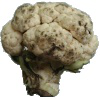

In [4]:
im=Image.open('Training/Cauliflower/236_100.jpg')
print(im.size)
im

(100, 100)


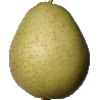

In [5]:
im=Image.open('Training/Pear/236_100.jpg')
print(im.size)
im

### Converting the data into PyTorch tensors

As you may remember, PyTorch processes all data in the form of *tensors*, which are nothing but N-dimensional arrays. Our first job is to find a way to convert images to tensors and vice versa (just in case we wish to visualize tensors as images). 

A quick google search tells us that the *torchvision* module of the PyTorch library functions contains some classes that can do this for us. Let us create objects of these classes, namely `img2tensor` and `tensor2img`. The names are pretty self explanatory!



> Lessons in Python:

> *Class*

> A class is a collection of different things, all under one roof. These things can be anything - data or functions  (these are the two broad categories that everything in programming can be put into, if you think about it). The data can be anything like - numbers, strings, *objects* of other classes *we'l look at *objects* next!), and functions are the peices of code that operate on this data, to provide us users with some functionality. (These functions within a class are also called as methods). 

> So, if you remember building models with SKLearn, we always used classes to build models. We first named our class something, and first gave it some *data* (usually our x's and y's) and then used the `.fit()` method (or function) to train the model!

> Objects are nothing but the real world implementations of classes. Classes are only templates about how data and functions (attributes and methods, to be more precise) can exist together and function together to provide usefulness to the user! An object is like the physical version of a class, that Actually does tasks and stores data physically.

> If you're not aware of the concept of classes and objects at all, it would be useful to spend some time learning about them. [Here](https://www.youtube.com/watch?v=n-DVyV2RjiY) is a video to help you understand the intuition behind them. The video teaches this concept in JAVA, which is a really old (classic) but popular language to learn object oriented programming (which is nothing but the style of programming, which contains lots and lots of classes and objects). 

> One we dive a little deeper into classes in python, we'll provide with more resources to learn about the more technical details.


Python is a fully object oreiented programming language, meaning everything in python is an object of some class. Turns out, that objects are essential in data sciences, because of the flexibility they provide in bundling different data and functionality together, which is also one of the reasons why python is so famous for data sciences. 

Let us start with creating `img2tensor` and `tensor2img`, which are objects of the classes `ToTensor` and `ToPILImage`.


In [6]:
from torchvision.transforms import ToTensor,ToPILImage
img2tensor = ToTensor()
tensor2img=ToPILImage()

Let us see these classes in action!

In [7]:
img2tensor(im) #gives us a tensor

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [8]:
img2tensor(im).shape

torch.Size([3, 100, 100])

`img2tensor` takes in a PIL image as input, and gives a tensor as an output. 

Notice how `img2tensor` is an object of a class, but is used like function. This is a special feature of python. We have the liberty to define the functionality of an object, when it is used like a function. (like `output = object_name(input)` We will learn about this in more detail below. 

But first let us move ahead. Next, we need to go to the location where all images are, and convert each image to a tensor so that we can get the final `x` and `y` for our model!. To handle paths, we use the `pathlib` library. And to navigate through directories, we use the `os` library in python.

In [9]:
import os
from pathlib import Path
Path.ls =lambda x: os.listdir(x) # this funcitonality gives us the contents of a directory, in a LINUX style command ("ls")

Next, we've written a function that takes in the paths of all the directories where are images are (for example, if our model contains data on cauliflowers and pears, we will pass in the paths where cauliflower and pear images are). And the model returns the `x` tensors and the corresponding ground truth labels `y`. 

Now, since we are dealing with tensors, we need the PyTorch library (`torch`), to handle tensors. So we import that!

In [10]:
import torch

In [11]:
def get_tensors_from_folder(folder_paths:list=None,normalize_x=True,preprocess_y=True):
    f"""
    Takes in the paths of all the categories that need to be considered, and returns a collective tensor for the input tensors and the target tensors. 
    normalize_x: Default True. If True, the function will automatically Gaussian normalize the input tensor x.
    preprocess_y: Default True. If True, the function will convert the labels to a series of numbers ranging from 0 to N-1, where N is the number of classes(categories). 
                                This is important if your classes are strings, or unordered. Computers cannot understand anything other than numbers. More than that, 
                                Neural Networks, as you will see, only understand categories that go as 0,1,2,....N-1 (if there are N categories to be classified in total.)
    """
    x = None 
    y = []
    folder_paths=list(folder_paths)

    for folder_path in folder_paths:
        for img_path in folder_path.ls():
            x=torch.cat((img2tensor(Image.open(folder_path/img_path))[None],x)) if x is not None else img2tensor(Image.open(folder_path/img_path))[None]
            # y=torch.cat((torch.Tensor(folder_path.stem),y)) if y is not None else torch.Tensor(folder_path.stem)
            y.append(folder_path.stem)

    if normalize_x: 
        x.sub_(x.mean()).div_(x.std())
    if preprocess_y:
        proc={v:k for k,v in enumerate(sorted(set(y)))}
        y=[proc[v] for v in y]

    y=torch.Tensor(y).long()
    return x.reshape(x.shape[0],-1),y

So, now that we've defined the function to retrieve the relevant tensors, we will use it to derive the training `x` and `y` tensors and the testing `x` and `y` tensors. 

In [12]:
path_cauliflowers = Path('Training/Cauliflower')
path_pears=Path('Training/Pear')

x_train,y_train=get_tensors_from_folder([path_cauliflowers,path_pears])
x_train.shape, y_train.shape

(torch.Size([1194, 30000]), torch.Size([1194]))

In [13]:
path_cauliflowers = Path('Test/Cauliflower')
path_pears = Path('Test/Pear')

x_test,y_test = get_tensors_from_folder([path_pears,path_cauliflowers])
x_test.shape,y_test.shape

(torch.Size([398, 30000]), torch.Size([398]))

## Datasets and Dataloaders

Next, we need to learn about 2 important concepts in datasciences - Dataset and Dataloaders.

Dataset: A Dataset is nothing but a class which bundles the `x` and `y`. This is important, because its very inefficient to have to specify x and y separately everytime. They always go together. So the dataset class makes our life easier, by simply bundling x and y. You can simply retrieve the individual x and y by calling the attributes `dataset.x` and `dataset.y`.

Below is a simple implementation of the Dataset class. 

Any dataset class should have three properties

* It should have `x` and `y` as its attributes. 
* We should be able to get the length of the dataset (with the `__len__` (pronounced dunder len) method)
* We should be able to get a specific value by index (with the `__getitem__` method)

In [14]:
class Dataset(): # to wrap x and y together
    def __init__(self, x,y):self.x,self.y=x,y # __init__ is pythons way to initiate classes into objects. self.x is basically the process of setting x as an attribute of the object
    def __len__(self): return self.x.shape[0]
    def __getitem__(self,i): return self.x[i], self.y[i]

In [15]:
#Let us derive the training dataset
train_ds=Dataset(x_train,y_train)
len(train_ds) # we can use len on train_ds, because of the __len__ method

1194

In [16]:
train_ds[0] # __getitem__

(tensor([1.1289, 1.1289, 1.1289,  ..., 1.1289, 1.1289, 1.1289]), tensor(0))

In [17]:
#similarly let us derive the Validation Dataset
valid_ds=Dataset(x_test,y_test)
len(valid_ds)

398

Lessons in Python.
You may have used len and list_name[i] very frequently in the case of lists. Even list is a class in python, which ultimately implements the `__len__` and `__getitem__` methods 

In [18]:
my_list=[1,2,3,4,5]
len(my_list), my_list.__len__()

(5, 5)

In [19]:
my_list[0], my_list.__getitem__(0)

(1, 1)

The next concept is dataloaders. 
A dataloader is a convenient class in python that does 2 things.
1. It loads the data into the model (that we are going to build). Sometimes, it is not a wise idea to feed all the data into the model at once, because of memory constraints, so the dataloader can also feed data to the model in batches.
2. The dataloader can also make sure that the data is loaded onto the correct device (CPU or GPU). By default, everything is on the CPU, so you need to explicitly load the data on the GPU, if you wish so. So, dataloaders can save us from this unnecessary effort!

> What is a GPU?

> A GPU stands for Graphical Processing Unit (Just like CPU stands for Central Processing Unit). Its also known as a graphics card. If anyone of you is interested in gaming, you would know what a graphics card is! A GPU is like a CPU, but multitudes faster (sometimes millions of times faster). A GPU can do matrix multiplications and additions very fast, which is exactly what the graphics of any video game are - lots and lots of matrix operations. A CPU is much more capable of handling more complex operations than matrix operations, but a GPU, even though less capable of doing complex operations, is very fast at doing these basic operations. Turns out, that Deep Learning is nothing but a lot of matrix multiplications and additions, which is why we use GPUs for Deep Learning.

> There's a newer type of device, called the TPU, or the Tensor Processing Unit, which is a GPU, but meant specifically for Tensor Operations. So, a TPU can ideally handle much less complexity than a GPU, but can perform Deep Learning related operations at a much faster rate. They are still not commercially used, because 
1. They are still very costly
2. Because the community awareness is still low, there isnt much support for TPUs in deep learning libraries. It will take a few years, before TPUs become mainstream.

PyTorch implements DataLoaders for us. We will use that!

In [20]:
from torch.utils.data import DataLoader

In [21]:
train_dl=DataLoader(train_ds,batch_size=64,shuffle=True)
valid_dl=DataLoader(valid_ds,batch_size=128,shuffle=True) #batch_size double the batch_size of train_dl since valid_dl doesnt require gradients, so less space will be used, and thus batch_size can be increased. 

As you can see that, the DataLoader takes in a dataset, along with `batch_size` and an option to specify whether the data should be returned in random order, or in the same order as given in the dataset.

This dataloader now works just like an iterator.

In [22]:
len(train_dl)

19

In [23]:
for x,y in train_dl: print(x.shape, end=' ')

torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([64, 30000]) torch.Size([42, 30000]) 

We can simply feed in one batch of size 64 to the model at once. 

Now that we are set up with our data, let us move onto building our Neural Networks

## Creating our own Neural Network

PyTorch provides us with a really easy way to define Neural Networks, by simply stacking the different components (or layers) in a function called `Sequential`. 

PyTorch provides a module called `nn` which contains all Neural Network architecture related stuff




In [24]:
from torch import nn

In [25]:
def model(in_features,hidden_features,out_features): 
    return nn.Sequential(nn.Linear(in_features,hidden_features), nn.ReLU(), nn.Linear(hidden_features,out_features),nn.Sigmoid())

What does 

```nn.Sequential(nn.Linear(in_features,hidden_features), nn.ReLU(), nn.Linear(hidden_features,out_features), nn.Sigmoid())``` 

do ?

First of all, what are nn.Linear, nn.ReLU, and nn.Sigmoid?

nn.Linear is nothing but a linear model class. It is the implementation of the linear model we defined in the Linear/Logistic Regression session. That's the basic building block of a Neural Network.

nn.ReLU is the implementation of the *ReLU* Activation function, or the Rectified Linear Unit. We've seen the sigmoid activation function. The ReLU activation function looks like this.  

![](https://drive.google.com/uc?id=1YzqTmE-VLvLRzAj19Hde1vlcXv1JJNBr)

And is simply defined as 

$$ReLU(z) = max(0,z)$$

What is an activation function anyways?

### Activation Functions

As you know, a Neural Network is nothing but a stack different linear functions. But if you analyze a simple linear stack mathematically, as follows...

$$y_1=w_1.x + b_1$$
$$y_2 = w_2.y_1 + b_2 $$

$y_2$ can be simplified as:

$$y_2 = w_2(w_1.x_1 + b_1) + b_2 $$
$$ y_2 = w_2.w_1.x_1 + (w_2.b_1 + b_2)$$

which is nothing but another linear function

$$ y_2 = W.x_1 + B $$

which is exactly what $y_1$ could have represented. Then what was the point of stacking multiple linear layers? The ultimate point of stacking linear layers was because a single linear layer could not represent the complexity of functions in space. 

You can try stacking 3,4, or even more linear layers together, and write them mathematically, then simplify them, and see, that the final result will still be equivalent to one linear layer. 

So, how do we overcome this problem? This is where Activation Functions come into use. Activation Functions are non-linearities put in between of two linear layers. It turns out that that because of this non-linearity, the resulting model can achieve any level of complexity, with as little as 2 layers. Infact, a research proposed that with just 2 layers of Neural Networks (excluding the output layer), with a non-linearity activation function, can achieve arbitrarily any level of model complexity. Obviously, this is only in theory, and in practice you need more than 2 layers to achieve a level of complexity, which is why many Neural Nets have 100s, maybe even 1000s of layers. 

For now, we'll be focussing on only 2 layers (the input layer, and the hidden layer). (Hidden Layer is basically any linear layer in between the output and the input layer, both excluded. Refer to the figure in the beginning of this notebook).

There are many activation functions. Even Sigmoid is an activation function. Infact, in the earlier days, sigmoid was used in place of ReLU. But now, we only use ReLU as the activation function. 

 ---

Finally nn.Sigmoid is the implementation of the sigmoid function. Just like in the logistic regression model, we use sigmoid to scale the output between 0 and 1. This helps us interpret the model output better, in terms of probability. 

nn.Sequential stacks all these components together.
When we write

``` nn.Sequential(nn.Linear(in_features,hidden_features), nn.ReLU(), nn.Linear(hidden_features,out_features),nn.Sigmoid())```

When you feed data into this, the data fill be fed into the first layer of the stack, ie nn.Linear. The output of this Linear layer is fed into ReLU, the output of the ReLU is fed into the second Linear Layer, and finally the output of the Linear layer is fed to the Sigmoid function. 

The output of the Sigmoid function is our final output function, and we will make predictions based on that 
 

In [26]:
my_model = model(x_train.shape[-1],50,2)
my_model #prints out all the modules # uses the __repr__ method

Sequential(
  (0): Linear(in_features=30000, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=2, bias=True)
  (3): Sigmoid()
)

You can see the different layers in `my_model`.

nn.Sequential has some wonderful properties. It provides methods like the `.parameters` to return the list of learnable parameters in the model. So, if you remember the gradient descent algorithm from the Linear/Logistic Regression session, you would know that we need to update parameters. So nn.Sequential makes it easy for the model to recognize which data are the parameters.

In [27]:
for p in my_model.parameters(): print(p.shape)

torch.Size([50, 30000])
torch.Size([50])
torch.Size([2, 50])
torch.Size([2])


And we can simply use my_model as a function (even though its a class object). As seen below. This comes by implementing the `__call__` method, which tells the object to do something, if the object is directly used as a function. So the `__call__` method of the nn.Sequential must be implementing the functionality to pass the input through all the layers in the model and returning the output 

In [28]:
xb,yb=next(iter(train_dl))
pred = my_model(xb)

In [29]:
??my_model.__call__
# You can see, that there is some implementation of __call__, in the form of _call_impl . Details dont matter as of now

What do the predictions from the model look like? Let us analyze the `pred` tensor

In [30]:
pred.shape

torch.Size([64, 2])

`pred` is basically a tensor of 2 values for every one of the 64 inputs. These 2 outputs per input is basically the prediction of the probability of each one of the 2 categories (pears and cauliflowers). As we saw earlier, whichever neuron has the highest value, is basically the prediction of the model for that input. 

In [31]:
pred

tensor([[0.3833, 0.4453],
        [0.3914, 0.5194],
        [0.4474, 0.4746],
        [0.4516, 0.4708],
        [0.4544, 0.4482],
        [0.3784, 0.4595],
        [0.4175, 0.4766],
        [0.4270, 0.4797],
        [0.4373, 0.4464],
        [0.4016, 0.5360],
        [0.4669, 0.4883],
        [0.4047, 0.4949],
        [0.3690, 0.5035],
        [0.4058, 0.4649],
        [0.4125, 0.4742],
        [0.3700, 0.5096],
        [0.4636, 0.4378],
        [0.3945, 0.5354],
        [0.4139, 0.5078],
        [0.3219, 0.5468],
        [0.4128, 0.5056],
        [0.3794, 0.4974],
        [0.4461, 0.4718],
        [0.4201, 0.5313],
        [0.4159, 0.4373],
        [0.4222, 0.4741],
        [0.3797, 0.4554],
        [0.4523, 0.4756],
        [0.3904, 0.4638],
        [0.4353, 0.4738],
        [0.4221, 0.4916],
        [0.4223, 0.4346],
        [0.3595, 0.4963],
        [0.4511, 0.4799],
        [0.3754, 0.4513],
        [0.3507, 0.4992],
        [0.4474, 0.4693],
        [0.3806, 0.4291],
        [0.4

## Gradient Descent on Neural Networks.

Next, we will simply apply the **Gradient Descent** Algoithm to optimize our Neural Nets. If you don't remember what Gradient Descent is, head back to the Linear Regression and Logistic Regression sessions to understand it, and then come back!

The steps are the same. 
1. Get predictions from the model
2. Calculate loss function
3. Derive Gradients of parameters with respect to the loss function
4. Update the parameters by a specific step size (called as learning rate)
5. Calculate the accuracy on the validation/test dataset to find out how good your model is performing
6. Repeat this process for many iterations (or *epochs*)

We implemented this from scratch earlier. But now, we will use PyTorch's built in Gradient Descent Algorithm. 

In [32]:
learning_rate = 0.001
optimizer = torch.optim.SGD(my_model.parameters(), lr=learning_rate)

And we will also use the Cross Entropy Loss function inbuilt in PyTorch. If you dont remember what the Cross Entropy loss function does, head back to the Logisitic Regression session!

In [33]:
loss_fn=torch.nn.CrossEntropyLoss()

Next, we will pass the input through the model, and calculate the loss. Passing the data through the model is called a **forward pass** through the model.

In [34]:
# FORWARD PASS
pred=my_model(xb) # we only pass one batch at a time. Because many a times, the entire dataset is too large for the model to handle at once
loss=loss_fn(pred,yb)

And we calculate the gradients after this. You don't have to implement the gradient calculations on your own. PyTorch does that for you!

You would remember from the Linear/Logistic Regression session that we simply wrote `loss.backward` to calculate the *gradient of all parameters with respect to the loss`. (Now you understand why nn.Sequential's .parameter method is useful. With this, the model keeps track of where parameters and present, so that gradients can be calculated and they can be updated).

The method is called `.backward` because traditionally, the process of calculating gradients is called a **backward pass**. Its nothing but an implementation of the chain rule for derivative calculations. 

In [35]:
# BACKWARD PASS
loss.backward()

So, just to understand the state of the model at this point - We haven't trained the Neural Net at all right now. So let us see how the model is performing on the dataset right now, and we will compare it with the performance after we train the model.

So for that, we define an accuracy function, which basically checks how many predictions are the same as the target value (ground truth value).

The neural Network has 2 neurons at the output layer, corresponding to the two classes (pears and cauliflowers). Whichever neuron has the highest value, is the prediction for the given input. `torch.argmax` basically returns the index of the neuron with gives the highest value.

In [36]:
def accuracy(pred,targ): return (torch.argmax(pred,dim=1)==targ).float().mean() #understand this line of code. Search on google for the functionality of a term, if you dont understand

In [37]:
accuracy(pred,yb)

tensor(0.4219)

Now, if we update the parameters once, using the `optimizer.step` method of the `optimizer` class, let us see how the accuracy increases.

In [38]:
optimizer.step()
optimizer.zero_grad()

In [39]:
accuracy(my_model(xb),yb)

tensor(0.6094)

You can see that the accuracy has increased!

What is `optimizer.zero_grad()`? We mentioned this in the earlier sessions too, when we were discussing gradient descent, but we didnt describe it back then. Let us understand it now.

The idea is simple. By default, PyTorch *accumulates* (or keeps adding up ) gradients if you keep calculating gradients. This is not a bad thing, infact, its quite helpful when you have very small batch sizes, and you wish to accumulate gradients of multiple batches, (more the data used for parameter update, the better generalisation occurs in the final output). At the end, you have to manually *clear* the gradients, so that fresh gradients can be calculated. `.zero_grad` does exactly that. It replaces the gradients with a zero value. So the next time `.backward` is called, gradients are added to 0, which basically means, that fresh gradients are calculated. 

This is it. You've built your own Neural Network!

## Refactoring the entire code to a convenient class

The above code is quite scattered and clunky. We will refactor the code to make the entire Neural Network more understandable and easy to work with. 

Now is a good time to understand what `__init__` does. [Here](https://www.youtube.com/watch?v=ZDa-Z5JzLYM) is a great video by Cory Schafer on YouTube that explains this.  Actually, Cory Schafer has one of the best tutorials on object oriented programming in Python. So go check it out if you're interested!

In [40]:
class NeuralNetwork():
    def __init__(self,train_dl,valid_dl,model,loss_fn=nn.CrossEntropyLoss(),optimizer=None):
        f"valid_dl can be None. In that case, the model will be evaluated on the training set only"

        self.train_dl = train_dl
        self.valid_dl = valid_dl
        self.model = model
        self.loss_fn=loss_fn
        self.optimizer = torch.optim.SGD(self.model.parameters(),lr=0.1) if not optimizer else optimizer
        
    def train(self,epochs=1,lr=None,loss_fn=None):
        self.train_loss,self.valid_loss=[],[]
        if lr: self.opt.defaults['lr']=learning_rate
        if loss_fn: self.loss_fn=loss_fn

        for epoch in range(epochs):
            # self.model=self.model.train()
            for x,y in train_dl:                     
                loss=self.loss_fn(self.model(x),y)
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
                self.train_loss.append(loss)

            if self.valid_dl: print(f'epoch {epoch+1}:validation accuracy - {self.get_validation_accuracy()}')
            else: print(print(f'epoch {epoch+1}: training accuracy - {self.get_validation_accuracy(validation=False)}'))

    def get_validation_accuracy(self,validation=True):
        dl=self.valid_dl if validation else self.train_dl
        with torch.no_grad(): acc=[accuracy(self.model(x),y) for x,y in dl]
        return torch.Tensor(acc).mean().float()

In [41]:
my_model = model(x_train.shape[-1],50,2) # reinitializing the model
optimizer=torch.optim.Adam(my_model.parameters(),lr=0.0001)
my_network = NeuralNetwork(train_dl,valid_dl,my_model,loss_fn=loss_fn,optimizer=optimizer)

In [42]:
my_network.get_validation_accuracy() # checking the model performance before training, for comparison

tensor(0.4143)

In [43]:
my_network.train(1)

epoch 1:validation accuracy - 0.8155691623687744


You can see that with just one epoch, the model has improved significantly.

Try writing the above class from scratch, without looking at it. You'll be surprised by how much you learn about python and Neural Nets with just this one class definition. It should take you about 3-4 hours to write it. Peeking at the original function once in a while is okay, but your aim should be to understand everything, and being able to write it from scratch.

## Implementing nn.Sequential from scatch

We've implemented a model using nn.Sequential from scratch. But lets see what goes on under the hood. Let's actually look at the source code of the nn.Sequential function.

In Jupyter notebooks, you can look up the source code of any function using the `??` sign. 

So let us first go to the source code of the model function which we defined above.

In [44]:
??model

As expected, it would show us the definition of the model, as defined above. We used nn.Sequential within the `model` function.

So next, let us look up the source code of the nn.Sequential class.

In [45]:
??nn.Sequential

First of all, notice that nn.Sequential *inherits* from nn.Module. 

`nn.Module` is the base class for all functions in the `nn` (torch.nn). It contains basic information about how nn functions should behave. The `__call__` for all functions is implemented in nn.Module .

```
class Sequential(Module):
```

In [46]:
??nn.Module.__call__

There's a lot of technical code over there, but look for this main line of code.

```
result = self.forward(*input, **kwargs)
```

So, behind the scenes, nn functions call a function called `forward`. This is nothing but the function corresponding to the forward pass. Now you know why you can do a forward pass by simply calling the object like a function, with input as the argument to the function.

This forward function is all you need to define for any nn function. Even nn.Linear, nn.ReLU, nn.Signmoid define only a forward function, and the rest is done by the `__call__` method. 

Next, lets take a look at the `forward` function of the nn.Sequential function

In [47]:
??nn.Sequential.forward

You would see this.

```
def forward(self, input):
        for module in self:
            input = module(input)
        return input
```

what is a module? A module is the basic unit in nn.Sequential function. In our case, nn.Linear, nn.ReLU, nn.Sigmoid, etc are the basic units. Let us run this ourself to understand this better

In [48]:
#my_model is a nn.Sequential object
for module in my_model: print(module)

Linear(in_features=30000, out_features=50, bias=True)
ReLU()
Linear(in_features=50, out_features=2, bias=True)
Sigmoid()


As you can see, module is nothing but the different building layers of our model. 
So what nn.Sequential.forward is doing, is that it iterates through each layer, and passes the output from the previous layer to the next. 

Now that we know how it works, let a model using this behaviour from scratch!

In [49]:
class model(nn.Module):
    def __init__(self,layers):
        super().__init__()
        self.layers=layers
        for k,v in enumerate(self.layers): self.add_module(f"layer {k}",v) #nn.Sequential automatically added each layer as a module. We didnt have to do that. 
                                                                           #But now we have to do it ourselves. nn.Module has a function called add_module that can add any layer as a module of the class.

Now all we need to do is, define a forward function in this model class. But before that, lets see, if the model behaves properly

In [50]:
in_features=x_train.shape[-1]
hidden_features=50
out_features=2

layers=[nn.Linear(in_features,hidden_features), nn.ReLU(), nn.Linear(hidden_features,out_features),nn.Sigmoid()]
my_model=model(layers)

In [51]:
my_model

model(
  (layer 0): Linear(in_features=30000, out_features=50, bias=True)
  (layer 1): ReLU()
  (layer 2): Linear(in_features=50, out_features=2, bias=True)
  (layer 3): Sigmoid()
)

Yes, it does. You can see, that all the building blocks have been added as modules. Now we can create a forward function. 

Let us actually verify that this model class will use the `forward` function when called

In [52]:
# this will show an error at this point because forward is not implemented
# my_model(x_train)    #Uncomment to run

You can see that the error occurs at the line `result = self.forward(*input, **kwargs)`. Meaning, all we need to do is, define a forward function, and nn.Module will take care of the rest.


In [53]:
class model(nn.Module):
    def __init__(self,layers):
        super().__init__()
        self.layers=layers
        for k,v in enumerate(self.layers): self.add_module(f"layer {k}",v)
    
    def forward(self,x):
        for layer in self.layers: x=layer(x)
        return x

In [54]:
my_model=model(layers)
pred=my_model(x_train)
pred.shape

torch.Size([1194, 2])

Yes, the model prediction is working correctly now!

## Review

That's it for this session. In the next session, we'll look at more advanced concepts in Neural Networks, and following that, we'll dive into specific applications in Deep Learning, like Computer Vision, NLP and so on. 

In this session, we learnt how to build our own Neural Networks from scratch. We dived deep into PyTorch's elegant API and even learnt a lot new stuff in python. 

You are not expected to learn all this stuff in one go. There were too many concepts involved in this session, so its okay to take some time to understand all this stuff. Go through the whole notebook again if you need to, and make sure you understand everything well. 

We built Neural Networks the practical way - no math involved. Thats because libraries that exist today make sure we don't have to involve ourselves in unnecessary bookish mathematics. Infact, we saw how PyTorch provides us with functionalities to build our own Neural Networks in just one line of code - `nn.Sequential(...)`. Yes, we went much deeper than that. The sole reason behind that was to show you how things work at the foundational level of code. 

This is important when you want to modify the functionality of a code. If you simply don't know how nn.Sequential works, you cannot make it work in any other way than the default way. However, once you know how things work at the grassroot level,  you can make your code work in whatever way you want!

## Exercise (Evaluative)

Your task is to define the nn.Linear, nn.Sigmoid and nn.ReLU from scratch. You only have to implement the `forward` function in each of these classes. Once you do that, build a nn.Sequential object using not nn.Linear, etc, but the functions you define below. Run the Pear vs Cauliflower Classifier and make sure you get the same results.

You can use any python or pytorch inbuilt function if needed, but you cannot directly copy paste the code from the repective forward definitions of nn.Linear, etc.

In [55]:
import math

In [56]:
class linear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        self.reset_parameters() #used to kaiming initialize parameters
    
    def reset_parameters(self): #implementation of the kaiming initialization. IGNORE THIS
        nn.init.kaiming_uniform_(self.weight, a=math.sqrt(5))
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)

    def forward(self,x):
        return torch.matmul(x, torch.t(self.weight))+self.bias

In [57]:
class relu(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        return x.clamp(min=0)

In [58]:
class sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,x):
        return torch.sigmoid(x)

In [59]:
in_features=x_train.shape[-1]
hidden_features=50
out_features=2

layers=[linear(in_features,hidden_features), relu(), linear(hidden_features,out_features),sigmoid()]
my_model=nn.Sequential(*layers)

In [60]:
my_model

Sequential(
  (0): linear()
  (1): relu()
  (2): linear()
  (3): sigmoid()
)

In [61]:
optimizer=torch.optim.Adam(my_model.parameters(),lr=0.0001)

In [62]:
mynet=NeuralNetwork(train_dl,valid_dl,my_model,optimizer=optimizer)

In [63]:
mynet.get_validation_accuracy() #checking accuracy before the training cycle

tensor(0.4177)

In [64]:
mynet.train()

epoch 1:validation accuracy - 0.8314732313156128
